In [1]:
# Import Dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time 
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.

latitudes = np.random.uniform(low = -90, high = 90, size = 1500)
longitudes = np.random.uniform (low = -180, high = 180, size = 1500)
latitudes_longitudes = zip(latitudes,longitudes)
latitudes_longitudes

In [3]:
# Unpack the longitudes and latitudes and put them in a list. 

coordinates = list(latitudes_longitudes)
len(coordinates)

1500

In [4]:
# Nearest cities for the above coordinates.

# Create a empty list that will hold all the cities name nearest to the above coordinates.
cities = []
# Identify the nearest city for each latitude and longitutde combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # if city is unique then add to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



606

In [5]:
# Basic for the OpenWeatherMap with weather_api_key added to the URL.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold weather data for cities.
city_data = []
# Print the begining of logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1

set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | igrim
Processing Record 5 of Set 1 | libres
Processing Record 6 of Set 1 | mira
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | kamenka
Processing Record 11 of Set 1 | hovd
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | magdagachi
Processing Record 15 of Set 1 | darnah
Processing Record 16 of Set 1 | kutum
Processing Record 17 of Set 1 | mezen
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | monroe
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | broome
Processing Record 24 of

Processing Record 42 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 43 of Set 4 | carlos antonio lopez
Processing Record 44 of Set 4 | kaeo
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | taoudenni
Processing Record 47 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 48 of Set 4 | bogorodskoye
Processing Record 49 of Set 4 | umarkot
Processing Record 50 of Set 4 | tahe
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | grand gaube
Processing Record 3 of Set 5 | les cayes
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | pemba
Processing Record 6 of Set 5 | hobyo
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5 | okhotsk
Processing Record 9 of Set 5 | trairi
Processing Record 10 of Set 5 | pangody
Processing Record 11 of Set 5 | ponta do sol
Processing Record 12 of Set 5 | bloomingdale
Processing Record 13 of Set 5 | dubai
Processing Recor

Processing Record 30 of Set 8 | itupiranga
Processing Record 31 of Set 8 | kanniyakumari
Processing Record 32 of Set 8 | ngunguru
Processing Record 33 of Set 8 | hayden
Processing Record 34 of Set 8 | ypsonas
Processing Record 35 of Set 8 | ishigaki
Processing Record 36 of Set 8 | vieste
Processing Record 37 of Set 8 | fuengirola
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | bosobolo
Processing Record 40 of Set 8 | vila franca do campo
Processing Record 41 of Set 8 | sa kaeo
Processing Record 42 of Set 8 | salalah
Processing Record 43 of Set 8 | warqla
City not found. Skipping...
Processing Record 44 of Set 8 | sokol
Processing Record 45 of Set 8 | abonnema
Processing Record 46 of Set 8 | mareeba
Processing Record 47 of Set 8 | revda
Processing Record 48 of Set 8 | satitoa
City not found. Skipping...
Processing Record 49 of Set 8 | vallenar
Processing Record 50 of Set 8 | lolua
City not found. Skipping...
Processing Record 1 of Set 9 | furano
Processing Recor

Processing Record 20 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 21 of Set 12 | matay
Processing Record 22 of Set 12 | yerbogachen
Processing Record 23 of Set 12 | nicoya
Processing Record 24 of Set 12 | juifang
City not found. Skipping...
Processing Record 25 of Set 12 | tuy hoa
Processing Record 26 of Set 12 | saint-joseph
Processing Record 27 of Set 12 | benguela
Processing Record 28 of Set 12 | birjand
Processing Record 29 of Set 12 | maun
Processing Record 30 of Set 12 | aguimes
Processing Record 31 of Set 12 | nyrsko
Processing Record 32 of Set 12 | tornio
Processing Record 33 of Set 12 | parambu
Processing Record 34 of Set 12 | prince rupert
Processing Record 35 of Set 12 | zeya
Processing Record 36 of Set 12 | cervo
Processing Record 37 of Set 12 | matoury
Processing Record 38 of Set 12 | nasice
Processing Record 39 of Set 12 | poronaysk
Processing Record 40 of Set 12 | olimpia
Processing Record 41 of Set 12 | gaziantep
Processing Record 42 of Set 12 | ans

In [7]:
# Tally number of cities on the city_data.  
len(city_data)

559

In [8]:
# Create the DataFrame from the array of dictionaries.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,77.00,69,90,5.82,US,2020-04-04 06:08:24
1,Vaini,-21.20,-175.20,78.80,78,75,6.93,TO,2020-04-04 06:08:24
2,Albany,42.60,-73.97,46.99,93,90,4.70,US,2020-04-04 06:08:20
3,Igrim,63.19,64.42,39.54,75,41,15.05,RU,2020-04-04 06:08:26
4,Libres,19.47,-97.68,62.31,32,99,8.16,MX,2020-04-04 06:08:26
5,Mira,45.44,12.13,51.01,75,0,5.82,IT,2020-04-04 06:08:26
6,Georgetown,5.41,100.34,91.40,59,20,5.82,MY,2020-04-04 06:07:26
7,Grindavik,63.84,-22.43,24.80,58,75,24.16,IS,2020-04-04 06:08:11
8,Ilulissat,69.22,-51.10,5.00,60,0,16.11,GL,2020-04-04 06:08:26
9,Kamenka,51.32,42.77,50.00,37,0,8.01,RU,2020-04-04 06:08:26


In [9]:
# Reorder the columns of the  city data DataFrame.

new_columns_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_columns_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2020-04-04 06:08:24,19.73,-155.09,77.00,69,90,5.82
1,Vaini,TO,2020-04-04 06:08:24,-21.20,-175.20,78.80,78,75,6.93
2,Albany,US,2020-04-04 06:08:20,42.60,-73.97,46.99,93,90,4.70
3,Igrim,RU,2020-04-04 06:08:26,63.19,64.42,39.54,75,41,15.05
4,Libres,MX,2020-04-04 06:08:26,19.47,-97.68,62.31,32,99,8.16
5,Mira,IT,2020-04-04 06:08:26,45.44,12.13,51.01,75,0,5.82
6,Georgetown,MY,2020-04-04 06:07:26,5.41,100.34,91.40,59,20,5.82
7,Grindavik,IS,2020-04-04 06:08:11,63.84,-22.43,24.80,58,75,24.16
8,Ilulissat,GL,2020-04-04 06:08:26,69.22,-51.10,5.00,60,0,16.11
9,Kamenka,RU,2020-04-04 06:08:26,51.32,42.77,50.00,37,0,8.01


In [10]:
# Create the output csv file.

output_data_file = "weather_data/cities.csv"
# Export the city_data into the csv file.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
# Extract relavant fields from the DataFrame for plotting. 

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [12]:
# Get today's date in seconds using time from time moduledate.
date_today = time.time()
date_today = time.strftime('%x')
date_today

'04/04/20'

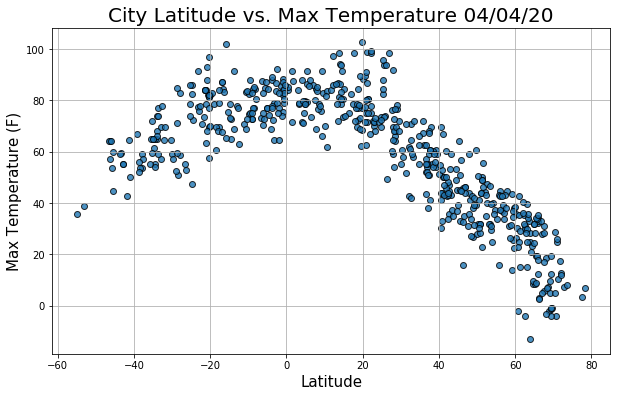

In [13]:
# Plot Latitude vs. Temperature.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, max_temps, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Max Temperature (F)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig1.png')
# Show the plot.
plt.show()

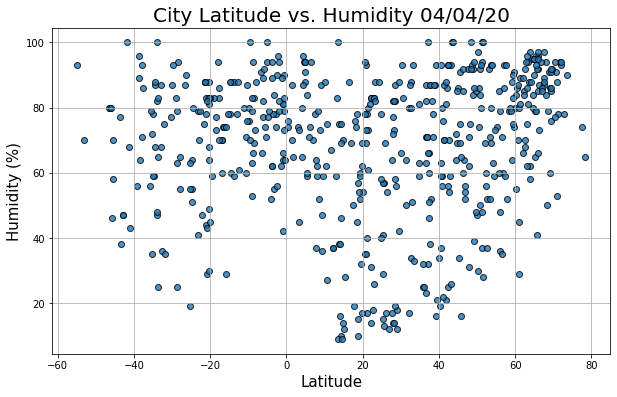

In [14]:
# Plot Latitude vs. humidity.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, humidity, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Humidity (%)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig2.png')
# Show the plot.
plt.show()

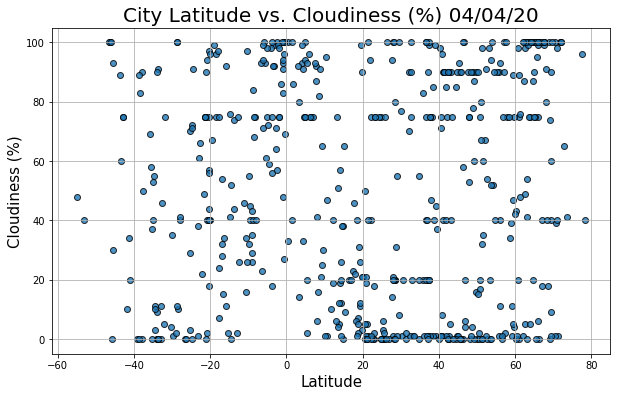

In [15]:
# Plot Latitude vs. cloudiness.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, cloudiness, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Cloudiness (%)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig3.png')
# Show the plot.
plt.show()

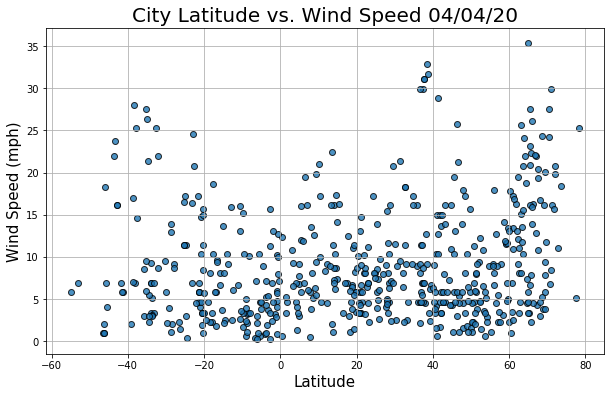

In [16]:
# Plot Latitude vs. wind speed.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, wind_speed, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Wind Speed (mph)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig4.png')
# Show the plot.
plt.show()

In [33]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation
# with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

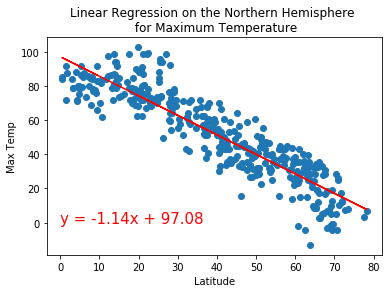

In [35]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title_1 = 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values,title_1,'Max Temp',(0,0))


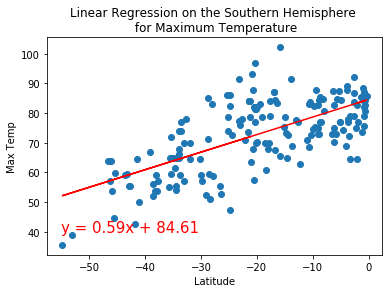

In [36]:
# Linear regression on the Southern Hemisphere.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values,title, 'Max Temp',(-55,40))

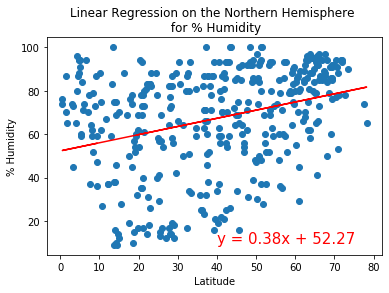

In [37]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

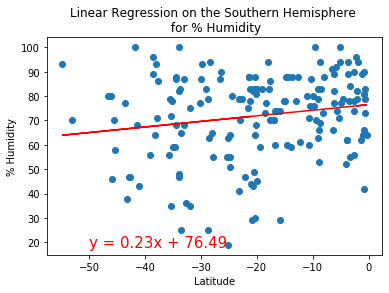

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,18))

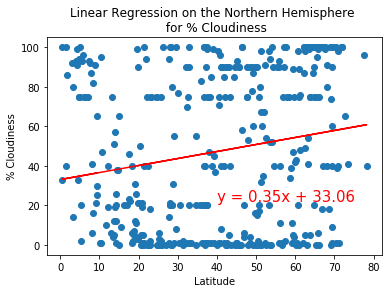

In [44]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,22))

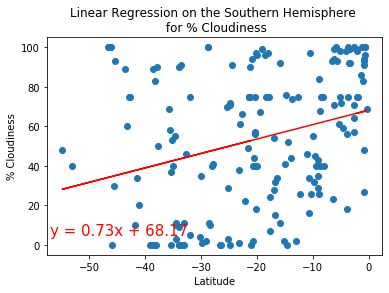

In [40]:
# Linear regression on the Southern Hemisphere.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-57,5))

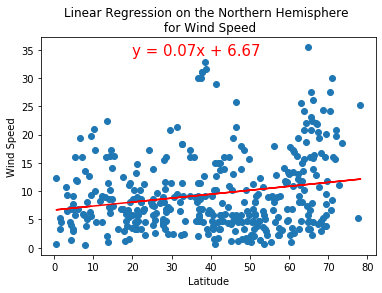

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,34))

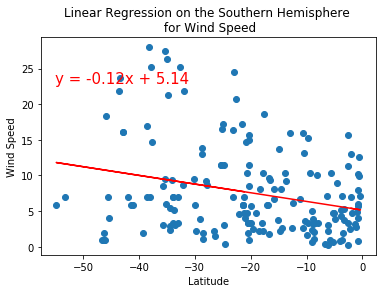

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,23))